# Homework 3 #

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


dataset_path = "../../datasets/parkinsons.csv"

df = pd.read_csv(dataset_path)

## Exercice 5

In [2]:
X = df.drop(columns=['target'])
y = df['target']

def linearRegression(X, y, i):
    # split the data with 80% in training and 20% in testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # create the model
    model = LinearRegression()

    # train the model
    model.fit(X_train, y_train)

    # test the model using mae as loss function
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    return mae

def mlp_no_act(X, y, i):
     # split the data with 80% in training and 20% in testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Create the Model
    mlp_no_act = MLPRegressor(hidden_layer_sizes = (10, 10), activation = 'identity', random_state = 0, max_iter=1000)
    # Train the Model
    mlp_no_act.fit(X_train, y_train)

    # Test the Model usin MAE as loss function
    y_pred = mlp_no_act.predict(X_test)
    mae_mlp_no_act = mean_absolute_error(y_test, y_pred)

    return mae_mlp_no_act  

def mlp_relu(X, y, i):
    # split the data with 80% in training and 20% in testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    mlp_relu = MLPRegressor(hidden_layer_sizes = (10, 10), activation = 'relu', random_state = 0, max_iter=1000)
    mlp_relu.fit(X_train, y_train)

    y_pred = mlp_relu.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    return mae

    


In [38]:
mlp_relu_avg = []
mlp_no_act_avg = []
linearRegression_avg = []
for i in range(1, 11):
    mlp_relu_avg.append(mlp_relu(X, y, i))
    mlp_no_act_avg.append(mlp_no_act(X, y, i))
    linearRegression_avg.append(linearRegression(X, y, i))

linreg_avg = np.mean(linearRegression_avg)
mlpnoact_avg = np.mean(mlp_no_act_avg)
mlprelu_avg = np.mean(mlp_relu_avg)

columns = ['Linear Regression', 'MLP no Act', 'MLP RELU']
averages = np.array([linreg_avg, mlpnoact_avg, mlprelu_avg]).reshape(1, -1) 
stats_df = pd.DataFrame(averages, columns = columns,  index = ['MAE'])
display(stats_df)

#print("MLP RELU: ", np.mean(mlp_relu_avg))
#print("MLP NO ACT: ", np.mean(mlp_no_act_avg))
#print("Linear Regression: ", np.mean(linearRegression_avg))

,Linear Regression,MLP no Act,MLP RELU
MAE,8.084054,8.091273,4.621453


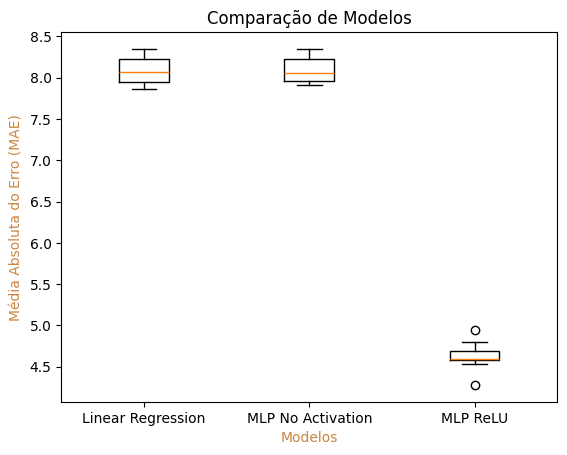

In [19]:
# Os teus dados
data = [linearRegression_avg, mlp_no_act_avg, mlp_relu_avg]
model_names = ['Linear Regression', 'MLP No Activation', 'MLP ReLU']

# Criar o boxplot
plt.boxplot(data)

# Adicionar os nomes dos modelos ao eixo X
plt.xticks([1, 2, 3], model_names)  # Índices começam em 1 para plt.boxplot

# Melhorar a legibilidade
plt.xlabel('Modelos', color = 'peru')
plt.ylabel('Média Absoluta do Erro (MAE)', color = 'peru')
plt.title('Comparação de Modelos')

# Mostrar o gráfico
plt.show()



## Exercice 6

A linear regressor can be modeled by the expression: $$ \hat{y} = Wx^T + b $$ This model aims to minimize a certain loss function, an error measure between the predicted and the real outputs, by ajusting the values of W, the weights. Since this model is linear, it assumes a linear relationship between the input variables and the output. This assumption is evidently a weak point to this model limiting graetly its generalization ability, being unable to identify non-linear relationships within the training data, wich means that, for datasets with contian these kinds of relationships or that are more complex, the model will struggle to perform well. 

When it comes to the MLP, each neuron applies a linear transformation followed by an activation function. On a normal MLP, the data is treated the following way: $$ z^{(1)} = W^{(1)}x^{(0)} + b^{(1)}. $$ ($x^0$ is the input). Then the activation function follows: $$ Φ^{(1)}(z^{(1)}) = x^{(1)}, $$ where $Φ$ represents the activation function. Then the preocess repeats: $$ z^{(2)} = W^{(2)}x^{(1)} + b^{(2)} \Rightarrow Φ^{(2)}(z^{(2)}) = x^{(2)}, $$ and again... $$ z^{(3)} = W^{(3)}x^{(2)} + b^{(3)} \Rightarrow Φ^{(3)}(z^{(3)}) = x^{(3)} = \hat{y}, $$ where $x^{(3)}=\hat{y}$ is the output. 

When there is no activation function, the neurons on the MLP only perform consecutive linear transformations on the data. The composition of the different linear transformations result in a single linear transformation, wich means that in the end, the MLP will behave similarly to a linear regressor: $$ \hat{y} = W^{(3)}(W^{(2)}(W^{(1)}x + b^{(1)}) + b^{(2)}) + b^{(3)} \Rightarrow$$ $$ \Rightarrow \hat{y} = W_{eq} x + b_{eq}, $$ onde $$ W_{eq} = W^{(1)}W^{(2)}W^{(3)} \ \ \ and \ \ \  b_{eq} = b^{(3)} + W^{(3)}b^{(2)} + W{(3)}W{(2)}b^{(1)}. $$ Hence, mathematicaly, an MLP without an activation function is nothing but a linear regressor that applies multiple linear transformations instead of just the one. 

This fact is clearly supported by the fact that these models performed equally on the last problem, as illustrated by the boxplots above. The small diference between the MAE of one and the other can be explained by the multiple linear transformations of the MLP opposed by the unique of the linear regressor. 

As mentioned above, the assumption of linearity within the data results in a weaker model that will struggle with more complex data that presents non-linear relationships. Therefore, if an activation function is implemented in the MLP, this problem will be overcome, since the regressor will be able to detect the non-linear relations wich are common in most "real world" problems. 

## Exercice 7

In [27]:
param_grid = {
    'batch_size': [32, 64, 128],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01]
}

X = df.drop(columns=['target'])
y = df['target']

# split the data with 80% in training and 20% in testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0, max_iter=3000)

# Scoring Function
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring = scorer)

# Fit the model to your data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=3000,
                                    random_state=0),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'batch_size': [32, 64, 128],
                         'learning_rate_init': [0.001, 0.01, 0.1]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'))

Melhores Hiperparâmetros: {'alpha': 0.01, 'batch_size': 32, 'learning_rate_init': 0.001}
MAE no conjunto de teste: 4.2345


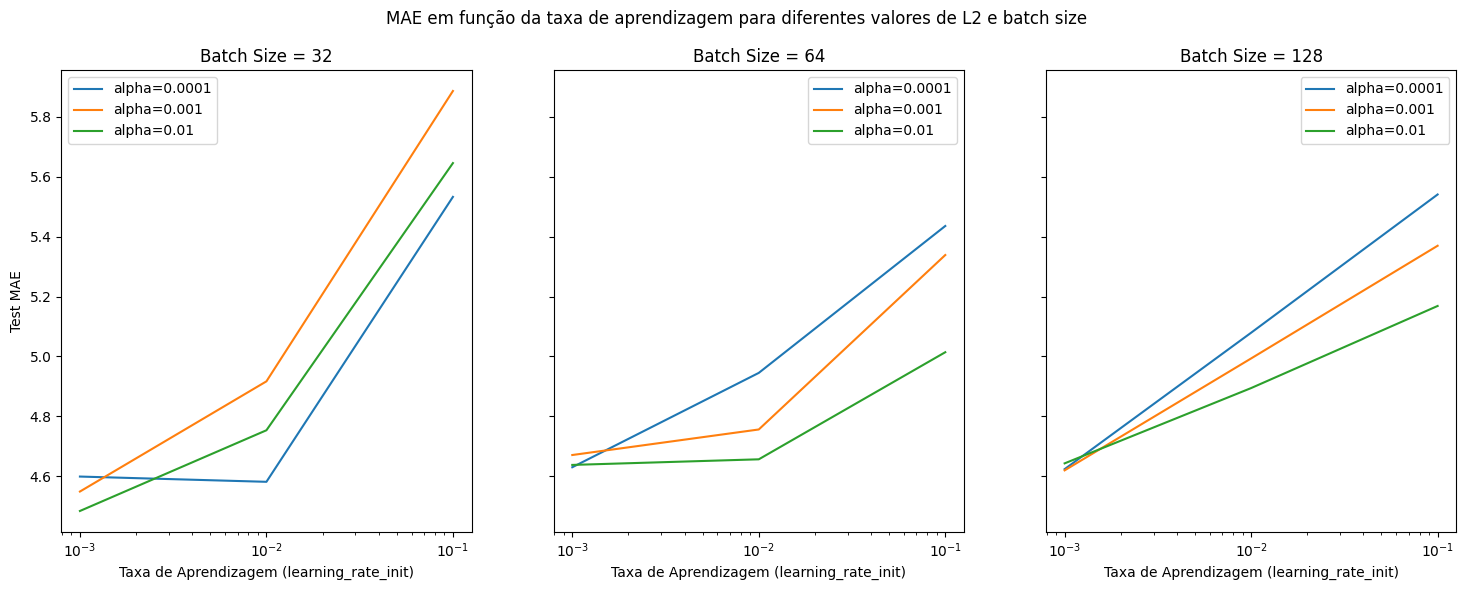

In [28]:

# Melhor combinação de hiperparâmetros
best_params = grid_search.best_params_
print(f"Melhores Hiperparâmetros: {best_params}")

# Previsão no conjunto de teste com os melhores parâmetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular o MAE no conjunto de teste
mae_test = mean_absolute_error(y_test, y_pred)
print(f"MAE no conjunto de teste: {mae_test:.4f}")

# Visualizar os resultados da Grid Search
results = pd.DataFrame(grid_search.cv_results_)

# Criar subplots para cada valor de batch_size
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre os tamanhos de batch e plotar os resultados
for i, batch_size in enumerate(param_grid['batch_size']):
    ax = axs[i]
    for alpha in param_grid['alpha']:
        subset = results[(results['param_batch_size'] == batch_size) & (results['param_alpha'] == alpha)]
        ax.plot(subset['param_learning_rate_init'], -subset['mean_test_score'], label=f'alpha={alpha}')
    
    ax.set_xscale('log')
    ax.set_xlabel('Taxa de Aprendizagem (learning_rate_init)')
    ax.set_title(f'Batch Size = {batch_size}')
    ax.legend()

axs[0].set_ylabel('Test MAE')
plt.suptitle('MAE em função da taxa de aprendizagem para diferentes valores de L2 e batch size')
plt.show()



The best combination of hyperparaeters is the following: {'Alpha' = 0.01, 'Learning Rate' = 0.0001, 'Batch Size' = 32}